Central Limit Theorem
====

## Unit 8, Lecture 1

*Numerical Methods and Statistics*

----

#### Prof. Andrew White, March 20 2018

Central Limit Theorem (CLT)
====

Why are normal distributions common? They arise because when you sum multiple random variables, they become normally distributed if:

1. They have finite means and variances
2. You have enough of them (20-25 usually)


Each observation in our distribution, $x$, follows:

$$x = \frac{1}{N} \sum_i^N r_i$$

where $r_i$ are coming from the same distribution or different distributions. The CLT says if $N$ is big enough, $p(x)$ will be normally distributed regardless of how $p(r_i)$s are distributed.

In [8]:
%matplotlib inline
import random
from scipy import stats as ss
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from math import sqrt, pi
def normal_pdf(x, mu, sigma):
    return 1 / (sigma * sqrt(2 * pi)) * np.exp(-(x - mu)**2 / (2. * sigma))
mpl.style.use(['seaborn-notebook', 'seaborn-darkgrid'])


CLT Demonstration with Beta Distribution
====

Let's see the CLT with only 1 distribution. Note, CLT doesn't apply because $N=1$ is not sufficiently large. Take our only contributing distribution,  $p(r_0)$ to be a beta distribution:
$$
p(r_0) = \frac{1}{Z}\, r_0^{\alpha - 1} \,(1 - r_0)^{\beta - 1}
$$

Where $Z$, $\alpha$, and $\beta$ are parameters of the beta distribution. For the beta distribution, the sample space is $[0,1]$. Don't worry about this distribution; you don't need to know it! But it's *different* than the normal distribution.

Now consider our averaging equation:
$$
x = \frac{1}{N} \sum_i^N r_i
$$


We have $N = 1$ because we have one distribution, the beta distribution. What will $p(x)$ look like? Will it be normal?

Not yet, becuase we have only $N = 1$. Let's try looking at $p(x)$. Instead of writing down the equation, we can instead use Python to *sample* realizations of $x$ many times and then histogram the results

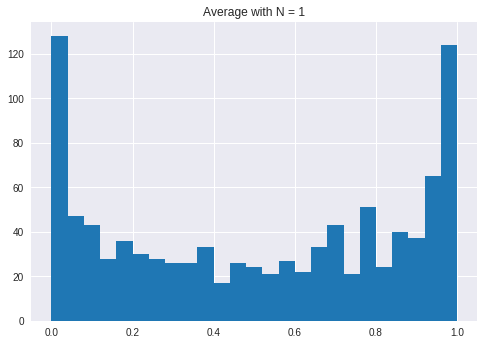

In [9]:
data = np.empty(1000)
#for 1000 times (enough to get a nice plot)
for i in range(1000):
    data[i] = ss.beta.rvs(0.5, 0.5) 


#histogram the samples
plt.hist(data, bins=25)
plt.title('Average with N = 1')

#Show the plot. 
plt.show() 

Remember that $N = 1$ means for each observation of $x$, we had 1 $r_i$ contributing to the average. Obviously this is silly, since $x$ = $r_1$, but let's see $N = 2$ where both $r_1$ and $r_2$ are the **same** beta distribution

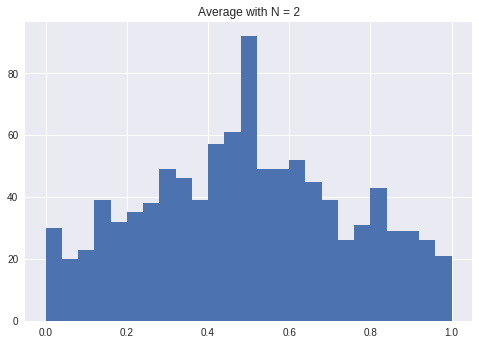

In [4]:
#Sample 2 beta numbers 1000 times
N = 2
data = np.empty(1000)
for i in range(1000):
    #Here's where we use the average equation
    r_1 = ss.beta.rvs(0.5, 0.5)
    r_2 = ss.beta.rvs(0.5, 0.5)
    data[i] = (r_1 + r_2) / 2

#histogram the samples with 25 bins
plt.hist(data, bins=25)
plt.title('Average with N = 2')
plt.show() 

Amazing! With $N = 2$ where already a little close. What's wrong with the domain though? How could this possibly be normal?!

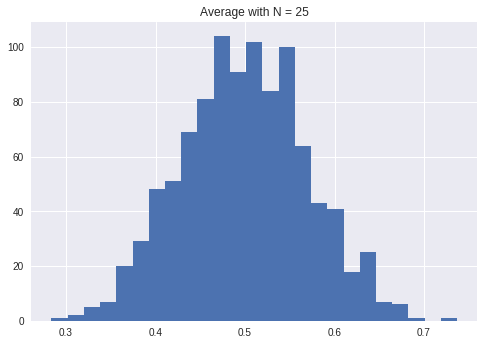

In [5]:
#Sample 25 beta numbers 1000 times
N = 25
data = np.empty(1000)
for i in range(1000):
    #Here's where we use the average equation
    #we'll do this more automatically using np.mean
    rs = ss.beta.rvs(0.5, 0.5, size=N)
    data[i] = np.mean(rs)

#histogram the samples with 25 bins
plt.hist(data, bins=25)
plt.title('Average with N = 25')
plt.show() 

As we increased the number of points contributing to the average, it eventually became a normal distribution!

CLT Demonstration with Multiple Binomial Distribution
====

We were able to move from a sample space from $[0,1]$ to make it appear to be $(-\infty, \infty)$. CLT also made a beta distribution, which has peaks at either end, become normal. Wow! Let's challenge it more. Consider sampling from a set of binomial distribututions and taking the average of the samples. Now we have multipled distributions and they're discrete!!

To remind ourselves, we're doing
$$
x = \frac{1}{N} \sum_i^N r_i
$$

where $r_i$ is sampled from $P_i(r_i)$, a set of **different** binomial distributions

In [6]:
N = 1

#Create an array of p parameters to use for our distributions
some_ps = np.random.random(N) 

#Create our M (trial number) parameters for binomial between 1 and 15.
#We don't go past 15 because it's time consuming to compute the numbers
some_Ms = np.random.randint(1, 15, N)

#create a place to store our data
data = []
for i in range(10000):
    point = 0
    for j in range(N):
         #We use the jth distribution parameters to sample
        point += ss.binom.rvs(some_Ms[j], some_ps[j])
    #We cast to float, since everything is done until now in integers
    data.append(float(point) / N) 

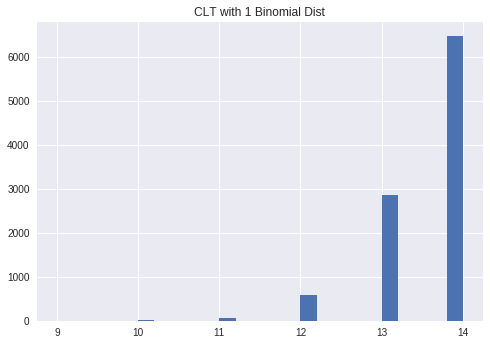

In [7]:
plt.hist(data, 25)
plt.title('CLT with 1 Binomial Dist')
plt.show()

So it looks like a binomail distribution, as expected since $N = 1$. Meaning we have one binomial distribution

In [8]:
N = 5

#Create an array of p parameters to use for our distributions
some_ps = np.random.random(N) 

#Create our M (trial number) parameters for binomial between 1 and 15.
#We don't go past 15 because it's time consuming to compute the numbers
some_Ms = np.random.randint(1, 15, N)

#create a place to store our data
data = []
for i in range(10000):
    point = 0
    for j in range(N):
         #We use the jth distribution parameters to sample
        point += ss.binom.rvs(some_Ms[j], some_ps[j])
    #We cast to float, since everything is done until now in integers
    data.append(float(point) / N) 

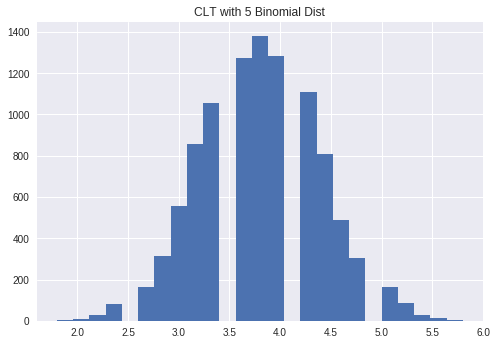

In [9]:
plt.hist(data, 25)
plt.title('CLT with 5 Binomial Dist')
plt.show()

In [10]:
N = 25

#Create an array of p parameters to use for our distributions
some_ps = np.random.random(N) 

#Create our M (trial number) parameters for binomial between 1 and 15.
#We don't go past 15 because it's time consuming to compute the numbers
some_Ms = np.random.randint(1, 15, N)

#create a place to store our data
data = []
for i in range(10000):
    point = 0
    for j in range(N):
         #We use the jth distribution parameters to sample
        point += ss.binom.rvs(some_Ms[j], some_ps[j])
    #We cast to float, since everything is done until now in integers
    data.append(float(point) / N) 

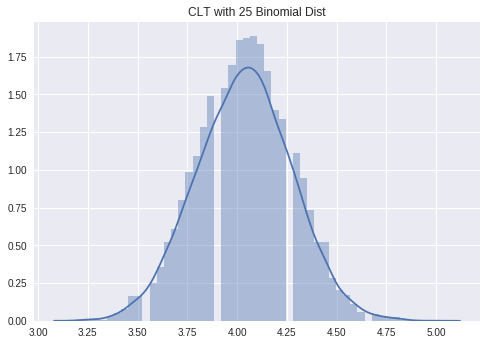

In [11]:
sns.distplot(data)
plt.title('CLT with 25 Binomial Dist')
plt.show()

Even though the component distributions are different and *discrete*, the average becomes a normal distribution!

CLT Trivia
====

Inidcate if the CLT applies to the following process:

* You take the yearly rainfall in 25 counties in Rochester and compute their average.
* You compute the average rainfall in a paricular city over the last 25 years.
* You have 20 temperature sensors placed inside of a batch reactor and compute their average.
* You measure the weight of 25 chemical samples
* You eat 25 random candy bars per day and sum up their calories.
* Your scale is inaccurate due to 20 sources of error (e.g, electrical circuit components air pressure, calibration). Assume their error is additive. You meausre the weight of something.
* Your scale is not normally distributed. Each time you weigh something, you weigh it 22 times and take the average.

Yes, yes, yes, no (you did not average them), yes, yes, yes

Discovering the true mean
====

One important application of the CLT is describing the distribution of sample means. We want to specifically compare sample means with population means, $\mu$. The word "population" means the statistics of an entire population of which we only see a small sample at any given time. You can also just think about it as the unknown probability distribution function that describes the samples we're observing. If we compuate a sample mean from a set of data from a population, it is described by:

$$ p(\bar{x})$$

where $\bar{x}$ is computed according to $$\bar{x} = \frac{1}{N} \sum_i^N x_i$$

Notice that it seems like $p(\bar{x})$ normal due to CLT!

This is a beautiful way of combining statistics and probability theory! We are doing sample means from some random data, $x_i$, which is a statistics problem and we're describing how this computation will look using probability theory.

Let's see what $p(\bar{x})$ looks like. Is it normal? How does its standard deviation/variance change? Is it a function of sample size?

Rather than derive an equation for this, let's write a *program* which calculates sample means and see what happens?

Let's see some code which calculates $\bar{x}$ multiple times given that we know the true population $\mu$. We will generate multiple samples of size $N$ and compute $\bar{x}$. Then we'll histogram all the $\bar{x}$s we see.

In [35]:
def hist_means(N, mean=2, std_dev=3, bins=25, samples=10000):
    data = [] #we store results here
    #We're going through the process of computing a sample mean/var this many times
    for i in range(samples):
        #create N random samples.
        random_samples = ss.norm.rvs(loc=mean, scale=std_dev, size=N)
        #take their mean
        sample_mean = np.mean(random_samples)
        data.append(sample_mean)
    #After generating the data, we histogram with the given bin number
    hist, bins = np.histogram(data, bins, normed=True)
    #We compute the centers of the bins by averaging the intervals
    #that make up the bins
    bin_centers = (bins[1:] + bins[:-1]) / 2.
    return hist, bin_centers

Notice we picked $\mu = 2$

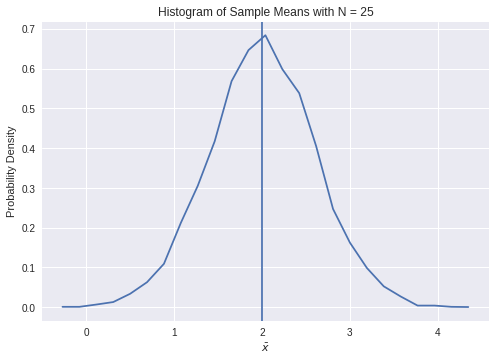

In [37]:
hist, bin_centers = hist_means(N=25)
plt.plot(bin_centers, hist)
plt.title('Histogram of Sample Means with N = 25')
plt.xlabel(r'$\bar{x}$')
plt.ylabel('Probability Density')
plt.axvline(x=2)
plt.show()

As expected, we see that the distribution is normal with $N = 25$ samples. Also, we see that the distribution is centered on $\mu$! So our guess for the distribution of $\bar{x}$ is so far:

**Guess 1**:
$$
p(\bar{x}) = \mathcal{N}(\mu, ?)
$$

To see what the standard deviation of sample mean is, let's try changing the *population* standard deviation

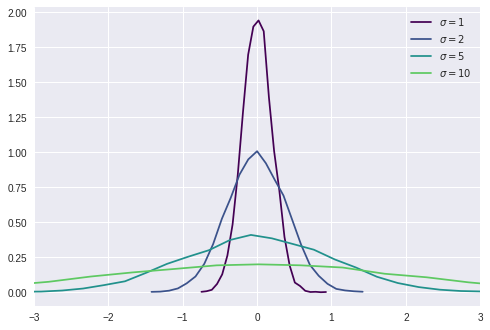

In [46]:
#These are the stddevs
sigmas = [1, 2, 5, 10]
#This creates a color function, using the summer palette
color_map = plt.get_cmap("viridis")
#loop over sigmas
for i in range(len(sigmas)):
    #call our function above
    hist, bin_centers = hist_means(25, mean=0, std_dev=sigmas[i])
    #plot the results, label it, and use our color function to get a color
    plt.plot(bin_centers, hist, color=color_map(i / len(sigmas)), label="$\\sigma={}$".format(sigmas[i]))
#add a plotting legend
plt.legend()
#set the x-axis limit
plt.xlim(-3, 3)
plt.show()

It looks like a higher *population* standard deviation leads to more uncertainty in our estimate for $\mu$. Our estaimte for $\mu$ of course being $\bar{x}$. Let's see if we can analytically describe this relationship. Let's guess that:

**Guess 2:**
$$
p(\bar{x}) \propto \mathcal{N}(\mu, \sigma)
$$

We're gussing that the CLT gives us a normal distribution centered at $0$ whose standard deviation is the population standard deviation. We can check this guess by converting the standard normal distribution:

$$
Z = \frac{x - \mu}{\sigma}
$$

In [1]:
def hist_means_scaled(N, mean=2, std_dev=3, bins=25, samples=10000):
    data = []
    for i in range(samples):
        random_samples = ss.norm.rvs(loc=mean, scale=std_dev, size=N)
        sample_mean = np.mean(random_samples)
        #The change!
        data.append((sample_mean - mean) / std_dev)
    hist, bins = np.histogram(data, bins, normed=True)
    bin_centers = (bins[1:] + bins[:-1]) / 2.
    return hist, bin_centers

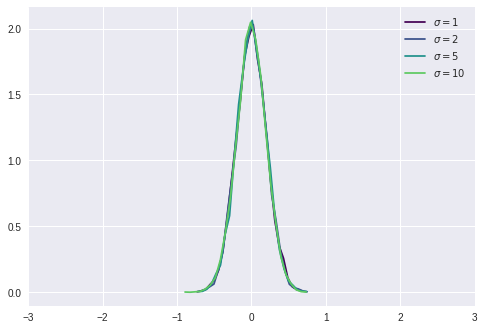

In [42]:
sigmas = [1, 2, 5, 10]
color_map = plt.get_cmap("viridis")
for i in range(len(sigmas)):
    hist, bin_centers = hist_means_scaled(25, std_dev=sigmas[i])
    plt.plot(bin_centers, hist, color=color_map(i / len(sigmas)), label="$\\sigma={}$".format(sigmas[i]))
plt.legend()
plt.xlim(-3, 3)
plt.show()

Jackpot! Now we now how to describe $p(\bar{x})$. However, we haven't assessed the effect of the number of samples! How does $N$ affect it?

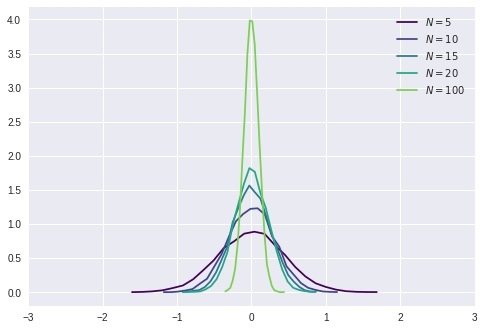

In [10]:
#These are the sample sizes we'll try out
Ns = [5, 10, 15, 20, 100]
color_map = plt.get_cmap("viridis")
for i in range(len(Ns)):
    hist, bin_centers = hist_means_scaled(Ns[i])
    plt.plot(bin_centers, hist, color=color_map(i / len(Ns)), label="$N={}$".format(Ns[i]))
plt.legend()
plt.xlim(-3, 3)
plt.show()

This looks like what happened, that there is a scaling effect. It turns out, the effect is similar:

$$
p(\bar{x}) = \mathcal{N}\left(\mu, \frac{\sigma}{\sqrt{N}}\right)
$$

This is indeed the answer. 

We will often discuss the uncertainty in the population mean. That means how well we know the opulation mean. This is $p(\bar{x} - \mu)$. Using the knowledge above, we can see that:

$$
p(\bar{x} - \mu) = \mathcal{N}\left(0, \frac{\sigma}{\sqrt{N}}\right)
$$

One interesting attribute is that we can view either $\bar{x}$ as the variable or $\mu$ as the variable. If we view $\mu$ as the variable, we're describing where we think the population mean might be. If, on the other hand, we view $\bar{x}$ as the variable, we're describing where our sample mean will be if we take a sample.

We will use the words uncertatiny and error as synonyms. 

The error in population mean is a normal distribution with ${\cal N} (0, \sigma / \sqrt{N})$  where $\sigma$ is the true/population $\sigma$. We usually call the standard deviation of this distribution the "standard error":

$$\sigma_e = \frac{\sigma}{\sqrt{N}} $$

Analytical Equation for Error in Population Mean
----

We saw above how things look when we histogram and sample. That gave us an empirical look at how the sample mean varies relative to the population mean. Let's now see our analytical equation above compare with the histograms.

As stated above, using our sample mean to estimate our population mean leads to a probability distribution:

$$
p(\bar{x} - \mu) = \mathcal{N}(0, \sigma / \sqrt{N}) = \frac{1}{2\sqrt{\frac{\sigma^2 \pi} {N 2}}} e^{-\frac{\left(\bar{x} - \mu\right)^2}{2\sigma^2 / N}}
$$

**where now we'll take the independent variable as the population mean ($\mu$)**

Let's compare our empirical estimates above to this:

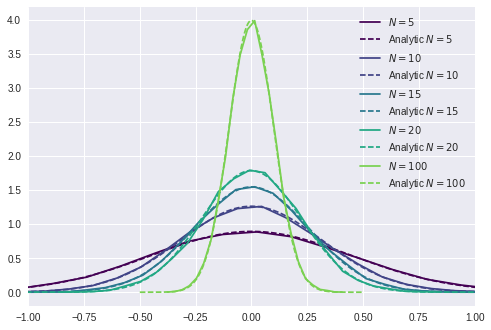

In [11]:
pop_std = 1

#this is the code from above
for i in range(len(Ns)):
    Ni = Ns[i]
    hist, bin_centers = hist_means_scaled(Ni, std_dev=pop_std, samples=25000)    
    plt.plot(bin_centers, hist, color=color_map(i / len(Ns)), label="$N={}$".format(Ni))
    #plot analytic
    #make some points that span the high-probability density values
    standard_error = pop_std / np.sqrt(Ni)
    x = np.linspace(- 5*standard_error, 5 * standard_error, 500)
    plt.plot(x, ss.norm.pdf(x, scale=standard_error), color=color_map(i / len(Ns)), label="Analytic $N={}$".format(Ni), linestyle='--')
plt.legend()
plt.xlim(-1, 1)
plt.show()

So it is true that $p(\bar{x} - \mu)$ follows a normal distribution when we know the population standard deviation!

Error in Population Mean - Example Problem
====

I know that $\sigma = 0.2$ g for a chemical balance. I am calibrating my micro-pipettes which requires me to weigh out a volume of water. I weigh out 1 ml of water 20 times with a micro-pipette. The sample mean is 1.001 g. What is the probability the true mean of the micro-pipette is within 0.001 g of the sample mean?

This is a normal distribution with ${\cal N} (0, \sqrt{0.2^2 / 20})$ and I want the interval between -0.001 and 0.001.

$\DeclareMathOperator{\erf}{erf}$
$\DeclareMathOperator{\cdf}{CDF}$
$$\int_{Z_1}^{Z_2} {\cal N}(0, 1) = \cdf(Z_2) - \cdf(Z_1)$$

In [12]:
from math import sqrt

sigma = sqrt(0.2**2 / 20)
Z1 = -0.001 / sigma
Z2 = -Z1

print( ss.norm.cdf(Z2) - ss.norm.cdf(Z1))

0.0178397545029


Unkown Population Standard Deviation
====
What if we do not have the population variance or standard deviation and we're estimating it at the same time? Let's explore to see if it's still normal.

**Now we include the $1/N$ term we observed previously, so that we remove the influence of sampling.**

In [59]:
def make_hist(N, mean=12, std_dev=3, bins=25, samples=100000):
    data = []
    for i in range(samples):
        random_samples = np.random.normal(mean, std_dev, N) 
        sample_mean = np.mean(random_samples)
        sample_var = np.var(random_samples) * (N / (N - 1.0))
        #We add the sqrt(N) dependence below
        data.append((sample_mean - mean) / (sqrt(sample_var) / sqrt(N)))
    hist, bins = np.histogram(data, bins = np.linspace(-3, 3, bins))
    bin_centers = (bins[1:] + bins[:-1]) / 2.
    #This line we changed so that we're working in probability, not counts.
    return hist / samples, bin_centers 

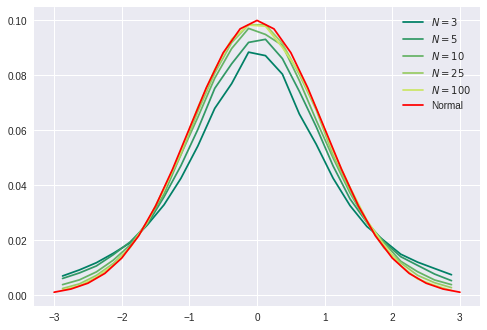

In [68]:
Ns = [3, 5, 10, 25, 100]
color_map = plt.get_cmap('summer')
for i in range(len(Ns)):
    Ni = Ns[i]
    hist, bin_centers = make_hist(Ni, std_dev=1)
    plt.plot(bin_centers, hist, color=color_map(i / len(Ns)), label='$N={}$'.format(Ni))

from math import erf
x = np.linspace(-3,3,25)
#The extra factor is to scale the pdf to match our data
plt.plot(x,normal_pdf(x, 0, 1) / (erf(3 / sqrt(2)) - \
                                  erf(-3 / sqrt(2))) / 2,
         label="Normal", color='red')
    
plt.legend()
plt.show()

Does Unknown Population Standard Deviation and Mean Obey CLT?
====

**Not until ~25 samples**. If the sample size is smaller, assuming a normal distribution gives too conservative of intervals. Note that CLT applies whenever we know population standard deviation. It does not with small sample number and when we're estimating both the sample mean and sample standard deviation.

Student's t-distribution
====
The distribution which describes the distance between the sample and true mean (population mean) when we do not know standard deviation is called the Student's $t$-distribution.

$p(\mu - \bar{x})$ follows a $t$-distribution with $\sigma_e = \sigma_x / \sqrt{N}$. 


$$T(0, \sigma_x / \sqrt{N}, N)$$

Note that this takes in additional parameter, $N$.

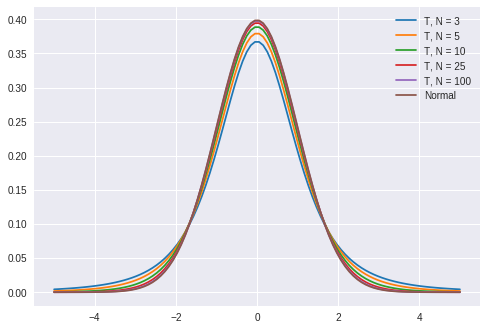

In [34]:
import scipy.stats

#make some points
x = np.linspace(-5,5, 100)

#Compute pdf on t and normal
yn = scipy.stats.norm.pdf(x)
for i, Ni in zip(color_i, N):
    y = scipy.stats.t.pdf(x, df=Ni)
    plt.plot(x,y, label="T, N = {}".format(Ni))    
plt.plot(x,yn, label="Normal")
plt.legend()

plt.show()

Summary
====

Estimating the population mean from a sample mean is a random distribution. The sample mean, $\bar{x}$, is a statistic and $\mu$ is a random variable which follows either a normal or $t$-distribution. 

When we know the population standard deviation, $p(\mu) = {\mathcal N}(\bar{x}, \sigma / \sqrt{N})$ where $N$ is the number of samples we used to calculate the sample mean and $\sigma$ is the population standard deviation. 

When we do not know the population standard deviation, there is some additional error/uncertainty because we are estimating the population standard deviation with a sample standard deviation. Using $\sigma_x$ to indicate the sample standard deviation: $p(\mu) = T(\bar{x}, \sigma_x / \sqrt{N}, N)$. Notice the $t$-distribution depends on the number of samples (the third term)

The standard deviations of these distributions is $\sigma / \sqrt{N}$ or $\sigma_x / \sqrt{N}$. To reduce confusion of the fact that the standard deviation of the distribution for the population mean is different than the population standard devition, sometimes this is called the standard error:

$$
\sigma_e = \frac{\sigma}{\sqrt{N}}\; \textrm{or} \; \frac{\sigma_x}{\sqrt{N}}
$$

Now we know the probability distribution for the population mean, so that we can do things like calculate probabilities of intervals or plot probability densities of where the true mean lies.